In [28]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
import pickle

In [30]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [31]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
statlog_german_credit_data = fetch_ucirepo(id=144) 
  
# data (as pandas dataframes) 
X = statlog_german_credit_data.data.features 
y = statlog_german_credit_data.data.targets 
  
# metadata 
print(statlog_german_credit_data.metadata) 
  
# variable information 
print(statlog_german_credit_data.variables) 

{'uci_id': 144, 'name': 'Statlog (German Credit Data)', 'repository_url': 'https://archive.ics.uci.edu/dataset/144/statlog+german+credit+data', 'data_url': 'https://archive.ics.uci.edu/static/public/144/data.csv', 'abstract': 'This dataset classifies people described by a set of attributes as good or bad credit risks. Comes in two formats (one all numeric). Also comes with a cost matrix', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 1000, 'num_features': 20, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Other', 'Marital Status', 'Age', 'Occupation'], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1994, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5NC77', 'creators': ['Hans Hofmann'], 'intro_paper': None, 'additional_info': {'summary': 'Two datasets are provided.  the original dataset, in the form provided by

In [49]:
X

,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,Attribute11,Attribute12,Attribute13,Attribute14,Attribute15,Attribute16,Attribute17,Attribute18,Attribute19,Attribute20
0,0,6,4,4,1169,4,4,4,2,0,4,0,67,2,1,2,2,1,1,0
1,1,48,2,4,5951,0,2,2,1,0,2,0,22,2,1,1,2,1,0,0
2,3,12,4,7,2096,0,3,2,2,0,3,0,49,2,1,1,1,2,0,0
3,0,42,2,3,7882,0,3,2,2,2,4,1,45,2,2,1,2,2,0,0
4,0,24,3,0,4870,0,2,3,2,0,4,3,53,2,2,2,2,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,12,2,3,1736,0,3,3,1,0,4,0,31,2,1,1,1,1,0,0
996,0,30,2,1,3857,0,2,4,0,0,4,1,40,2,1,1,3,1,1,0
997,3,12,2,4,804,0,4,4,2,0,4,2,38,2,1,1,2,1,0,0
998,0,45,2,4,1845,0,2,4,2,0,4,3,23,2,2,1,2,1,1,0


In [50]:
y

,class
0,1
1,2
2,1
3,1
4,2
...,...
995,1
996,1
997,1
998,2


In [32]:
X.select_dtypes(include=["object"]).columns

Index(['Attribute1', 'Attribute3', 'Attribute4', 'Attribute6', 'Attribute7',
       'Attribute9', 'Attribute10', 'Attribute12', 'Attribute14',
       'Attribute15', 'Attribute17', 'Attribute19', 'Attribute20'],
      dtype='object')

In [33]:
cat_col=['Attribute1', 'Attribute3', 'Attribute4', 'Attribute6', 'Attribute7',
       'Attribute9', 'Attribute10', 'Attribute12', 'Attribute14',
       'Attribute15', 'Attribute17', 'Attribute19', 'Attribute20']

for i in cat_col:
    print(i,"-->",X[i].unique())

Attribute1 --> ['A11' 'A12' 'A14' 'A13']
Attribute3 --> ['A34' 'A32' 'A33' 'A30' 'A31']
Attribute4 --> ['A43' 'A46' 'A42' 'A40' 'A41' 'A49' 'A44' 'A45' 'A410' 'A48']
Attribute6 --> ['A65' 'A61' 'A63' 'A64' 'A62']
Attribute7 --> ['A75' 'A73' 'A74' 'A71' 'A72']
Attribute9 --> ['A93' 'A92' 'A91' 'A94']
Attribute10 --> ['A101' 'A103' 'A102']
Attribute12 --> ['A121' 'A122' 'A124' 'A123']
Attribute14 --> ['A143' 'A141' 'A142']
Attribute15 --> ['A152' 'A153' 'A151']
Attribute17 --> ['A173' 'A172' 'A174' 'A171']
Attribute19 --> ['A192' 'A191']
Attribute20 --> ['A201' 'A202']


In [34]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in cat_col:
    X[i]=le.fit_transform(X[i])
   

In [35]:
X.head()

,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,Attribute11,Attribute12,Attribute13,Attribute14,Attribute15,Attribute16,Attribute17,Attribute18,Attribute19,Attribute20
0,0,6,4,4,1169,4,4,4,2,0,4,0,67,2,1,2,2,1,1,0
1,1,48,2,4,5951,0,2,2,1,0,2,0,22,2,1,1,2,1,0,0
2,3,12,4,7,2096,0,3,2,2,0,3,0,49,2,1,1,1,2,0,0
3,0,42,2,3,7882,0,3,2,2,2,4,1,45,2,2,1,2,2,0,0
4,0,24,3,0,4870,0,2,3,2,0,4,3,53,2,2,2,2,2,0,0


In [36]:
'''['Attribute1', 'Attribute3', 'Attribute4', 'Attribute6', 'Attribute7',
       'Attribute9', 'Attribute10', 'Attribute12', 'Attribute14',
       'Attribute15', 'Attribute17', 'Attribute19', 'Attribute20']'''
with open("'Attribute1'.pkl","wb") as f:
    pickle.dump('Attribute1',f)

In [37]:
with open("scaled_data.pkl","wb") as f:
    pickle.dump(scaled_x,f)

In [48]:
import pickle
for col in cat_col:  
    X[col] = le.fit_transform(X[col])
    with open(f"{col}.pkl", "wb") as f:
        pickle.dump(X[col], f)

In [38]:
from sklearn.preprocessing import StandardScaler
st_scaler=StandardScaler()
scaled_x=st_scaler.fit_transform(X)

In [39]:
import pickle
with open("scaled_data.pkl","wb") as f:
    pickle.dump(scaled_x,f)

In [40]:
# min max scaler

from sklearn.preprocessing import MinMaxScaler
Min_mex_Scaler=MinMaxScaler()
Min_mex_Scaler.fit_transform(X)


array([[0.        , 0.02941176, 1.        , ..., 0.        , 1.        ,
        0.        ],
       [0.33333333, 0.64705882, 0.5       , ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.11764706, 1.        , ..., 1.        , 0.        ,
        0.        ],
       ...,
       [1.        , 0.11764706, 0.5       , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.60294118, 0.5       , ..., 0.        , 1.        ,
        0.        ],
       [0.33333333, 0.60294118, 1.        , ..., 0.        , 0.        ,
        0.        ]], shape=(1000, 20))

In [41]:
from sklearn.svm import SVC
svm_poly=SVC(kernel="poly")
svm_rbf=SVC(kernel="rbf")



In [42]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [43]:
svm_poly.fit(x_train,y_train)

,C,1.0
,kernel,'poly'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [44]:

with open ("ss_poly_Model.pkl",'wb')as f:
    pickle.dump(svm_poly,f)

In [45]:
svm_pred=svm_poly.predict(x_test)
svm_pred[:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [46]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix

print(f"Accuracy_score{accuracy_score(y_test,svm_pred)}")
print(f"precision_score{precision_score(y_test,svm_pred)}")
print(f"recall_score{recall_score(y_test,svm_pred)}")

Accuracy_score0.6966666666666667
precision_score0.696969696969697
recall_score0.9951923076923077


<Axes: >

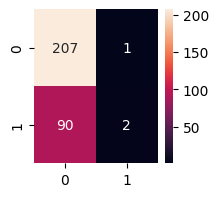

In [47]:
plt.figure(figsize=(2,2))
sns.heatmap(confusion_matrix(y_test,svm_pred),annot=True,fmt="d")